In [1]:
#raw_data = input().split(" ")

In [2]:
import pandas as pd
df = pd.read_csv("RTL.csv", encoding='ISO-8859-1')

In [3]:
import numpy as np

In [4]:
def transform_and_delete_missvalues(raw_data):
    """
    преобразует входные данные вида "а,б,в В,Г,Д"
    в масиив вида [[], [], []]
    удаляет те эллементы в которых содержаться неопределенные значения
    """
    splited_data = []
    for i in range(len(raw_data)):
        splited_data.append(raw_data[i].split('\n'))
    
    bad_frames = []
    for i in range(len(raw_data)):
        if '?' in raw_data[i]:
            bad_frames.append(i)
    bad_frames.reverse()
    for i in bad_frames:
        del splited_data[i]
    return splited_data

In [5]:
def one_fitch_binary_encoder(data, fitch_to_encode):
    """
    бинарный энкодер преобразующий конкретный категориальный признак
    выбираемый по индексу fitch_to_encode в набор новых численных признаков
    """
    encoded_data = []
    variants = set()
    for frame in data:
        try:
            variants.add(frame[fitch_to_encode])
        except:
            print(frame)
    variants = list(variants)
    power = np.ceil(np.log2(len(variants)))
    
    for frame in data:
        transformed_frame = frame
        binary_val = variants.index(transformed_frame[fitch_to_encode])
        del transformed_frame[fitch_to_encode]
        counter_power = power
        
        while counter_power:
            
            transformed_frame.append(1 if binary_val // 2**(counter_power-1) else -1)
            if transformed_frame[-1] > 0:
                binary_val -= 2**(counter_power-1)
            counter_power -= 1
        encoded_data.append(transformed_frame)
        
    return encoded_data

In [6]:
def binary_encoder (data, positions_to_encode):
    """
    энкодер преобразующий все указанные категориальные признаки
    """
    encoded_data = data
    positions_to_encode.reverse()
    for i in positions_to_encode:
        encoded_data = one_fitch_binary_encoder(encoded_data, i)
    return encoded_data

In [7]:
def normalisation(data, fsize = 0):
    """
    нормализвция признаков
    """
    normalised_data = []
    if not fsize:
        fsize = len(data[0])
    max_absts = [-np.inf] * fsize
    for frame in data:
        for i in range(fsize):
            if np.abs(frame[i]) > max_absts[i]:
                max_absts[i] = np.abs(frame[i])
    for frame in data:
        for i in range(fsize):
            frame[i] /= max_absts[i]
        normalised_data.append(frame)
    return normalised_data

In [8]:
def avgs(data):
    """
    среднее арифметическое по признакам
    """
    centrated_data = []

    fsize = len(data[0])
    avgs = [0] * fsize
    
    for frame in data:
        for i in range(fsize):
            avgs[i] += frame[i] / len(data)
              
    return avgs

In [9]:
def centrate(data, bayes):
    """
    центрирование признаков
    """
    centrated = []
    for frame in data:
        bayesed = []
        for i in range(len(frame)):
            bayesed.append(frame[i] - bayes[i])
        centrated.append(bayesed)
    return centrated
        

In [10]:
splited_data = list(np.array(df))

In [12]:
for i in range(len(splited_data)):
    splited_data[i] = list(splited_data[i])

In [13]:
#splited_data = transform_and_delete_missvalues(raw_data)
print(len(splited_data),'\n')
print(splited_data[0])

544 

['536365', '85123A', 'WHITE HANGING HEART T-LIGHT HOLDER', 6.0, '12/1/10 8:26', 2.55, 17850.0, 'United Kingdom']


In [14]:
categorial_fitches = [1,2,4,7]
encoded_data = binary_encoder(splited_data, categorial_fitches)


In [15]:
print(encoded_data[10])

['536367', 6.0, 2.1, 13047.0, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1]


In [16]:
ban = []
for i in range(len(encoded_data)):
    try:
        encoded_data[i] = list(map(float, encoded_data[i]))
    except:
        ban.append(i)
        pass
for i in reversed(ban):
    del encoded_data[i]

In [17]:
print(encoded_data[-1])

[536412.0, 1.0, 2.95, 17920.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0]


In [18]:
bayes = avgs(encoded_data)
centrated_data = centrate(encoded_data, bayes)

In [19]:
normalised_data = normalisation(centrated_data, fsize=0)
print(normalised_data[-1])

[np.float64(0.6940086554893518), np.float64(-0.035982935276715325), np.float64(-0.0033573162101417195), np.float64(0.6125840152481), np.float64(-0.02697495183043686), np.float64(-0.03898635477582235), np.float64(0.07243460764586972), np.float64(1.0), np.float64(-0.5816023738872408), np.float64(1.0), np.float64(-1.0), np.float64(-1.0), np.float64(-1.0), np.float64(1.0), np.float64(-0.5539358600583094), np.float64(-0.8379310344827586), np.float64(1.0), np.float64(0.9452554744525549), np.float64(-1.0), np.float64(-0.9667896678966789), np.float64(1.0), np.float64(1.0), np.float64(-0.402631578947369), np.float64(1.0), np.float64(-0.8067796610169493), np.float64(-0.9172661870503597), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(-1.0), np.float64(1.0)]


In [20]:
matrix = np.array(normalised_data)

In [21]:
matrix

array([[-1.00000000e+00, -2.39645718e-02, -5.83397728e-03, ...,
         1.00000000e+00,  9.24187726e-01, -9.17266187e-01],
       [-1.00000000e+00, -2.39645718e-02, -6.32989033e-04, ...,
        -9.88805970e-01, -1.00000000e+00, -9.17266187e-01],
       [-1.00000000e+00, -1.91572264e-02, -4.59564675e-03, ...,
        -9.88805970e-01, -1.00000000e+00, -9.17266187e-01],
       ...,
       [ 6.94008655e-01, -3.11755899e-02, -1.14064647e-02, ...,
         1.00000000e+00,  9.24187726e-01,  1.00000000e+00],
       [ 6.94008655e-01, -3.11755899e-02, -1.14064647e-02, ...,
        -9.88805970e-01, -1.00000000e+00, -9.17266187e-01],
       [ 6.94008655e-01, -3.59829353e-02, -3.35731621e-03, ...,
         1.00000000e+00, -1.00000000e+00,  1.00000000e+00]],
      shape=(533, 31))

In [22]:
U, s, vt = np.linalg.svd(matrix)

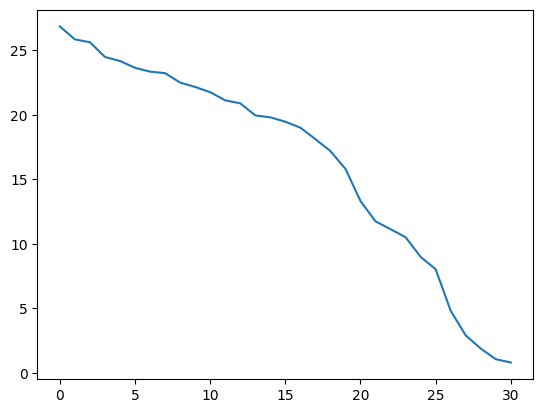

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(len(s)), s)